In [23]:
!pip install --upgrade numpy scipy pandas xgboost catboost

  Using cached numpy-2.1.0-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached catboost-1.2.5-cp312-cp312-macosx_11_0_universal2.whl.metadata (1.2 kB)
Using cached numpy-2.1.0-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Using cached catboost-1.2.5-cp312-cp312-macosx_11_0_universal2.whl (26.1 MB)


# 1. Load Data

In [24]:
import numpy as np

with open('X_res.npy', 'rb') as f:
    X_res = np.load(f)

with open('y_res.npy', 'rb') as f:
    y_res = np.load(f)


print(X_res.shape)
print(y_res.shape)

(17041, 24)
(17041,)


# 2. Train Test Split

In [25]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13632, 24), (3409, 24))

# 3. Model Training

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 


In [33]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [38]:
models_dict = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    # "CatBoosting Classifier": CatBoostClassifier(verbose=False)
}

In [39]:
def evaluate_models(X_train, y_train, X_test, y_test, models_dict):
    models_list = []
    accuracy_list = []
    auc= []
    
    for model_name, model in models_dict.items():
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(model_name)
        models_list.append(model_name)

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
    return report

In [41]:
base_model_report =evaluate_models(X_train, y_train, X_test, y_test, models_dict)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9516
- F1 score: 0.9552
- Precision: 0.9498
- Recall: 0.9607
- Roc Auc Score: 0.9509


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9314
- F1 score: 0.9365
- Precision: 0.9304
- Recall: 0.9426
- Roc Auc Score: 0.9305


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8836
- F1 score: 0.8920
- Precision: 0.8959
- Recall: 0.8882
- Roc Auc Score: 0.8832
----------------------------------
Model performance for Test set
- Accuracy: 0.8877
- F1 score: 0.8949
- Precision: 0.8991
- Recall: 0.8907
- Roc Auc Score: 0.8874


Logistic Regression
Model performance for Training 

/Users/premkumar/miniforge3/envs/venv_mlops/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8576
- F1 score: 0.8679
- Precision: 0.8721
- Recall: 0.8637
- Roc Auc Score: 0.8571
----------------------------------
Model performance for Test set
- Accuracy: 0.8589
- F1 score: 0.8682
- Precision: 0.8708
- Recall: 0.8656
- Roc Auc Score: 0.8584




# 4. Base Report

In [43]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.951599
4,K-Neighbors Classifier,0.942505
5,XGBClassifier,0.932238
1,Decision Tree,0.931358
2,Gradient Boosting,0.887650
6,Support Vector Classifier,0.877970
7,AdaBoost Classifier,0.858903
3,Logistic Regression,0.750660


# 5. Hyperparameter Tuning

In [42]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

##### Create a function for model_training and report which can be used in HP tuning loop'

In [44]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [45]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/premkumar/miniforge3/envs/venv_mlops/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.2s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.5s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.5s
[CV] END ....................max_depth=5, min_child_weight=3; total time=   0.5s
[CV] END ...................

/Users/premkumar/miniforge3/envs/venv_mlops/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.5s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.5s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.5s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   1.3s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   1.3s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   1.3s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   2.7s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   2.3s
[CV] END ...max_depth=10, max_features=log2, n_

/Users/premkumar/miniforge3/envs/venv_mlops/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.6s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.5s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.6s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.6s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.6s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.6s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.6s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.6s
[CV] END ....algorithm=auto, n_neighbors=4, weights=distance; total time=   0.4s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.4s
[CV] END ....algorithm=auto, n_neighbors=4, weights=distance; total time=   0.4s
[CV] END .....algorithm=auto, n_neighbors=5, we

In [46]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': None, 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}}

# 6. Training the model with best parameters

In [48]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X_train, y_train, X_test, y_test, best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9463
- F1 score: 0.9502
- Precision: 0.9459
- Recall: 0.9546
- Roc Auc Score: 0.9457


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9642
- F1 score: 0.9671
- Precision: 0.9557
- Recall: 0.9787
- Roc Auc Score: 0.9631


XGBClassifier
Model performance for Training set
- Accuracy: 0.9994
- F1 score: 0.9995
- Precision: 0.9992
- Recall: 0.9997
- Roc Auc Score: 0.9994
----------------------------------
Model performance for Test set
- Accuracy: 0.9484
- F1 score: 0.9522
- Precision: 0.9465
- Recall: 0.9579
- Roc Auc Score: 0.9476




In [49]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.964212
2,XGBClassifier,0.948372
0,Random Forest Classifier,0.946319


In [50]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9642
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1579
           1       0.96      0.98      0.97      1830

    accuracy                           0.96      3409
   macro avg       0.97      0.96      0.96      3409
weighted avg       0.96      0.96      0.96      3409



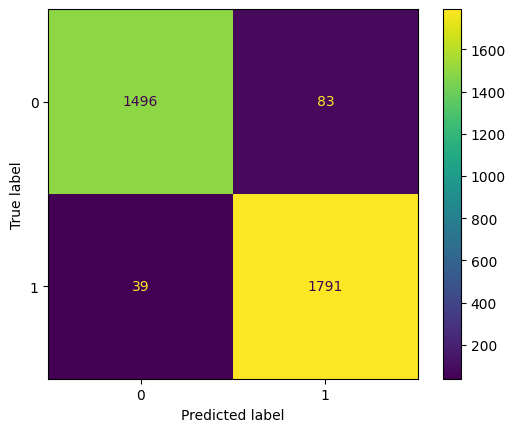

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)